In [1]:
import h5py
import numpy as np
import matplotlib.pyplot as plt

In [2]:
sample_path='/data/visitors/nanomax/20190570/2019052208/process/TiAlN_as_deposit/'
filename='2019-09-24T02_43_36.659364_F_2019-09-22T04_49_13.641589_scan_0010_pil1m_0000_integ_step_fit.h5'

# with h5py.File(self.data_input_file,'r') as h5f:
#            q_array = h5f["/entry/integ/q"][()]
#            integration_array = h5f["/entry/integ/data"][()]
#            sigma_array = h5f["/entry/integ/sigma"][()]
#            azimuth_array =h5f[ "/entry/integ/azimuth_range"][()]

source=sample_path+filename

In [3]:
with h5py.File(source,'r') as h5f:
    p = h5f['/entry/fit/p'][()]

res = range(p.shape[1])
ncols = 71

def sample_transf(res,ncols):
    nrows = int(p.shape[1]/ncols)
    res_reshaped = np.reshape(res,(nrows,ncols))
    return np.fliplr(res_reshaped)

res_reshaped = sample_transf(res,ncols)
print(res_reshaped)

[[  70   69   68 ...    2    1    0]
 [ 141  140  139 ...   73   72   71]
 [ 212  211  210 ...  144  143  142]
 ...
 [3478 3477 3476 ... 3410 3409 3408]
 [3549 3548 3547 ... 3481 3480 3479]
 [3620 3619 3618 ... 3552 3551 3550]]


In [4]:
peak = 2
pp = p[:,:,peak,:] # peak params [chi,irows,params] [int,pos,whidth,shape]

bad_chis = [4,5]
good_chis = []
for i in range(pp.shape[0]):
    if i not in bad_chis:
        good_chis += [i,]

[[2.82415106e-02 2.67192741e+00 2.03120701e-02 1.23013755e-15]
 [5.90867927e-02 2.66856560e+00 2.16490153e-02 8.84472342e-01]
 [7.39086394e-02 2.66715536e+00 2.35854045e-02 4.85253798e-01]
 ...
 [9.29343045e-03 2.66603410e+00 7.43782004e-03 8.15703048e-21]
 [3.83070954e-02 2.68653389e+00 2.54502578e-02 1.66983344e-13]
 [5.41791201e-02 2.65157872e+00 2.80000000e-02 1.00000000e+00]]
[[1.47723946e-02 2.67534184e+00 1.91584955e-02 1.22550954e-19]
 [2.36443817e-02 2.67685914e+00 2.41435318e-02 5.01770702e-01]
 [2.80126484e-02 2.67573960e+00 2.07508331e-02 4.87053441e-25]
 ...
 [2.61921983e-02 2.67115651e+00 2.80000000e-02 2.27122525e-18]
 [1.00000000e-10 2.66900000e+00 1.40000000e-02 3.00000000e-01]
 [5.81622385e-03 2.65905652e+00 9.98848494e-03 1.02092415e-06]]
[[4.53369844e-03 2.66738272e+00 1.08515908e-02 1.00000000e+00]
 [1.00000000e-10 2.66907730e+00 3.44595864e-04 3.00000000e-01]
 [           nan            nan            nan            nan]
 ...
 [3.86689883e-03 2.65316923e+00 5.7318

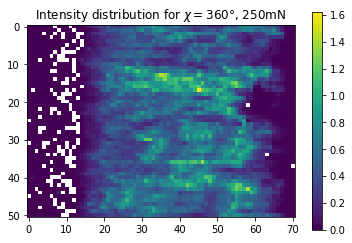

In [57]:
# show sample (intensity for 360deg integ)

#i0 = np.sum(pp[good_chis,:,0],axis=0)
i0 = pp[14,:,0] # 2,3,4,5,9?,10,11?,12? is bad

i0 = sample_transf(i0,ncols)
plt.imshow(i0)
plt.colorbar()
plt.title('i0 360 deg integration')
plt.title('Intensity distribution for $\chi=$360$\degree$, 250mN')
image_path='/mxn/home/gudlot/jupyter_notebooks/Images/UM/'+'Scan10_250mN_int_chi360'+'.pdf'
plt.savefig(image_path)



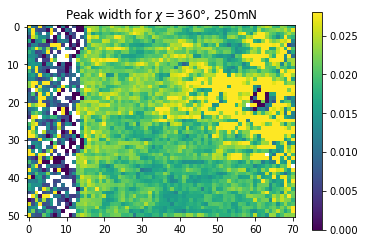

In [58]:
# show sample (width for 360deg integ)
val = pp[-1,:,2]

val = sample_transf(val,ncols)
plt.imshow(val)
plt.colorbar()
plt.title('peak widh 360 deg integ')
plt.title('Peak width for $\chi=$360$\degree$, 250mN')
image_path='/mxn/home/gudlot/jupyter_notebooks/Images/UM/'+'Scan10_250mN_111TiAlN_delta_d_chi360'+'.pdf'
plt.savefig(image_path)

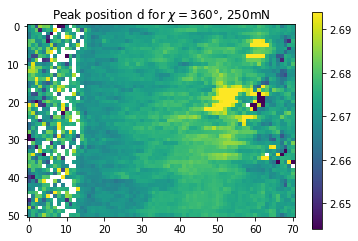

In [59]:
# show sample (position for 360deg integ)
val = pp[-1,:,1]

val = sample_transf(val,ncols)
plt.imshow(val)
plt.colorbar()
plt.title('peak position 360 deg integ')
plt.title('Peak position d for $\chi=$360$\degree$, 250mN')
image_path='/mxn/home/gudlot/jupyter_notebooks/Images/UM/'+'Scan10_250mN_111TiAlN_d_chi360'+'.pdf'
plt.savefig(image_path)

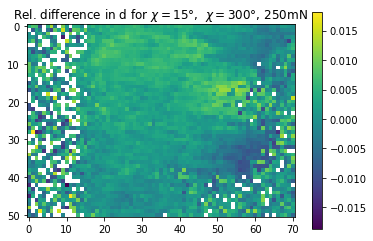

In [60]:
# show sample (position)
val0 = pp[10,:,1]
val1 = pp[1,:,1]

val = (val1-val0)/(val0+val1)*2.

val = sample_transf(val,ncols)
plt.imshow(val)
plt.colorbar()
plt.title('raltive difference of peak positions')
plt.title('Rel. difference in d for $\chi=$15$\degree$,  $\chi=$300$\degree$, 250mN')
image_path='/mxn/home/gudlot/jupyter_notebooks/Images/UM/'+'Scan10_250mN_111TiAlN_d_chi10_chi1'+'.pdf'
plt.savefig(image_path)